In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

__Dataset:__ https://ww2.amstat.org/publications/jse/v19n3/decock.pdf

Sales of individual residential property in Ames, Iowa from 2006 to 2010. The data set contains 2930 observations and 80 explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values.

In [89]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [90]:
#get mean & median sales prices

print('Mean sale price for all properties: {}'.format(train.SalePrice.mean()))
print('Median sale price for all properties: {}'.format(train.SalePrice.median()))

Mean sale price for all properties: 180921.19589041095
Median sale price for all properties: 163000.0


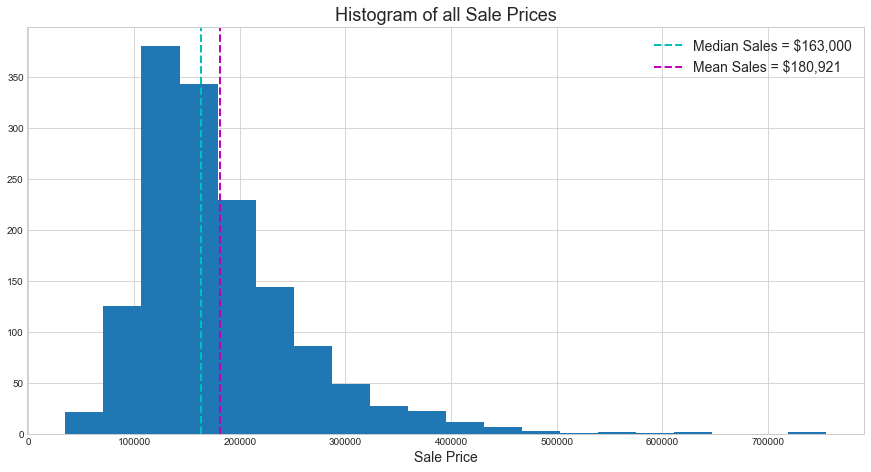

In [91]:
#histogram of all sales prices
sns.set_style('whitegrid')
plt.figure(figsize = (15,7.5))
plt.hist(train['SalePrice'], bins = 20)
plt.axvline(train.SalePrice.median(), color = 'c', linestyle = 'dashed', linewidth = 2, label = 'Median Sales = $163,000')
plt.axvline(train.SalePrice.mean(), color = 'm', linestyle = 'dashed', linewidth = 2, label = 'Mean Sales = $180,921')
plt.xlabel('Sale Price', size = 14)
plt.title('Histogram of all Sale Prices', size = 18)
plt.legend(prop={'size':14})
plt.show()

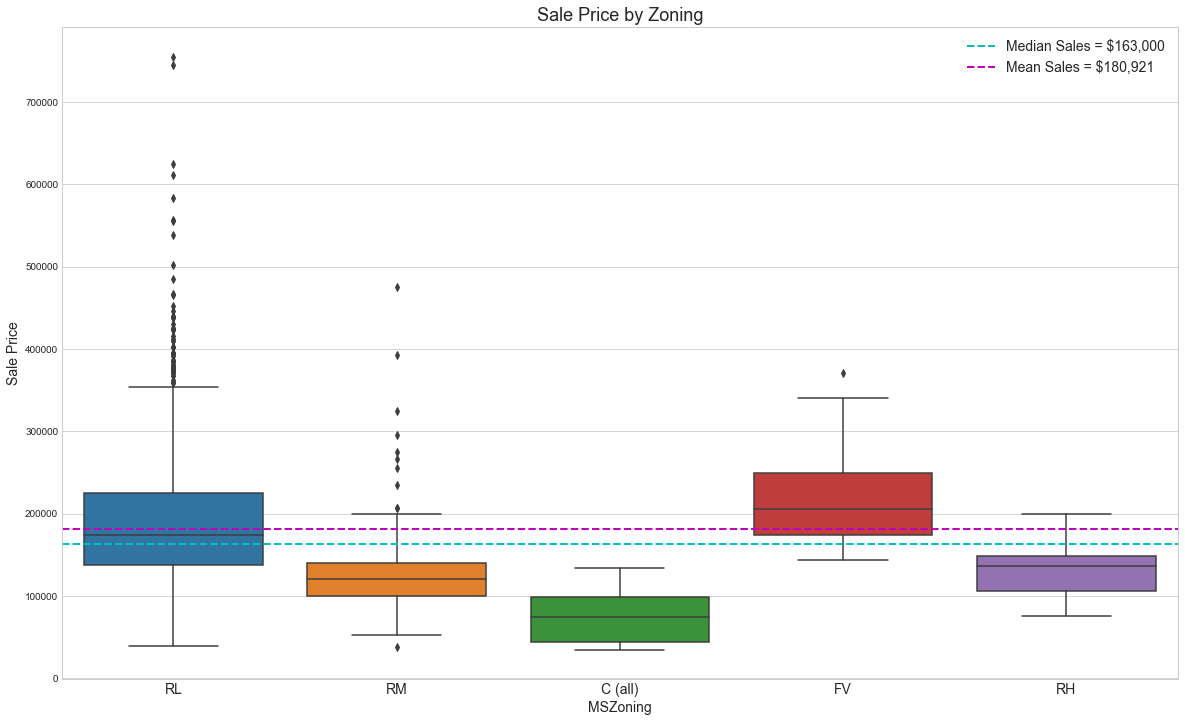

In [105]:
#sales price by zoning
sns.set_style('whitegrid')
plt.figure(figsize = (20,12))

sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = train)
plt.axhline(train.SalePrice.median(), color = 'c', linestyle = 'dashed', linewidth = 2, label = 'Median Sales = $163,000')
plt.axhline(train.SalePrice.mean(), color = 'm', linestyle = 'dashed', linewidth = 2, label = 'Mean Sales = $180,921')
plt.xticks(size = 14)
plt.xlabel('MSZoning', size = 14)
plt.ylabel('Sale Price', size = 14)
plt.title('Sale Price by Zoning', size = 18)
plt.legend(prop={'size':14})

plt.show()

__Variables__

RL = Residential Low Density

RM = Residential Medium Density

C = Commercial

FV = Floating Village Residential

RH = Residential High Density

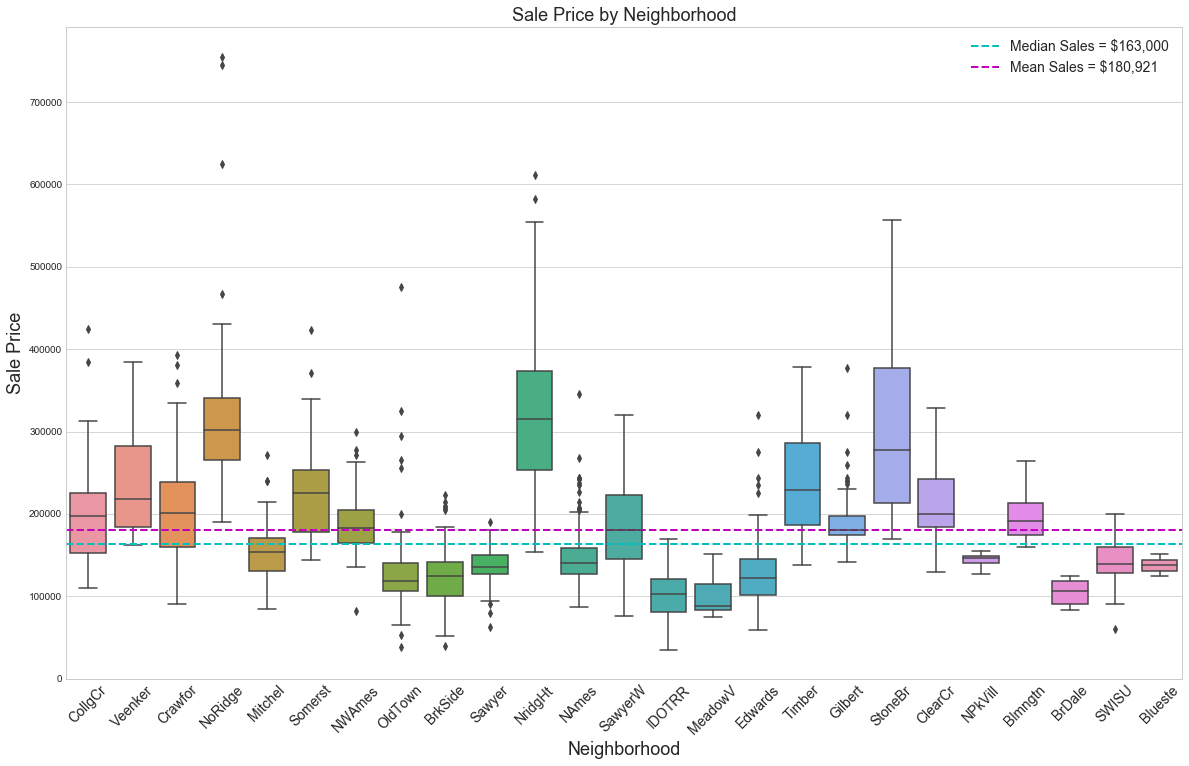

In [104]:
#sale price by neighborhood
plt.figure(figsize = (20,12))

sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = train)
plt.axhline(train.SalePrice.median(), color = 'c', linestyle = 'dashed', linewidth = 2, label = 'Median Sales = $163,000')
plt.axhline(train.SalePrice.mean(), color = 'm', linestyle = 'dashed', linewidth = 2, label = 'Mean Sales = $180,921')
plt.xticks(size = 14, rotation = 45)
plt.xlabel('Neighborhood', size = 18)
plt.ylabel('Sale Price', size = 18)
plt.title('Sale Price by Neighborhood', size = 18)
plt.legend(prop={'size':14})

plt.show()

In [94]:
neighborhood_counts = pd.DataFrame(train.Neighborhood.value_counts())
neighborhood_counts.head(3)

,Neighborhood
NAmes,225
CollgCr,150
OldTown,113


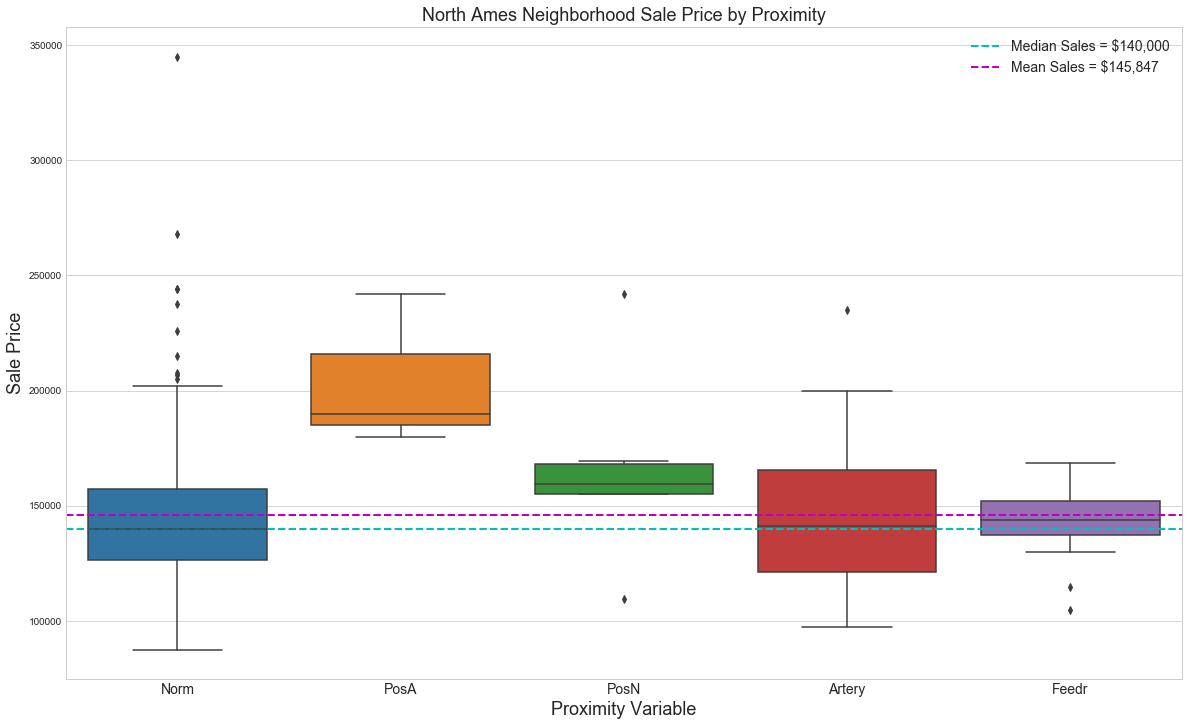

In [107]:
#sales price by proximity for largest 3 neighborhoods

NAmes = train.loc[lambda df: train['Neighborhood'] == 'NAmes']
#print(NAmes.SalePrice.median())
#print(NAmes.SalePrice.mean())

labels = {'Artery':'Adjacent to arterial street',
         'Feedr':'Adjacent to feeder street',
         'Norm':'Normal',
         'RRNn':'Within 200\' of North-South Railroad',
         'RRAn':'Adjacent to North-South Railroad',
         'PosN':'Near positive off-site feature--park, greenbelt, etc.',
         'PosA':'Adjacent to postive off-site feature',
         'RRNe':'Within 200\' of East-West Railroad',
         'RRAe':'Adjacent to East-West Railroad'}

plt.figure(figsize = (20,12))
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = NAmes)
plt.axhline(NAmes.SalePrice.median(), color = 'c', linestyle = 'dashed', linewidth = 2, label = 'Median Sales = $140,000')
plt.axhline(NAmes.SalePrice.mean(), color = 'm', linestyle = 'dashed', linewidth = 2, label = 'Mean Sales = $145,847')
plt.xticks(size = 14)
plt.xlabel('Proximity Variable', size = 18)
plt.ylabel('Sale Price', size = 18)
plt.title('North Ames Neighborhood Sale Price by Proximity', size = 18)
plt.legend(prop={'size':14})

plt.show()

__Variables__

Norm = Normal

PosA = Adjacent to postive off-site feature

PosN = Near positive off-site feature--park, greenbelt, etc.

Artery = Adjacent to arterial street

Feedr = Adjacent to feeder street

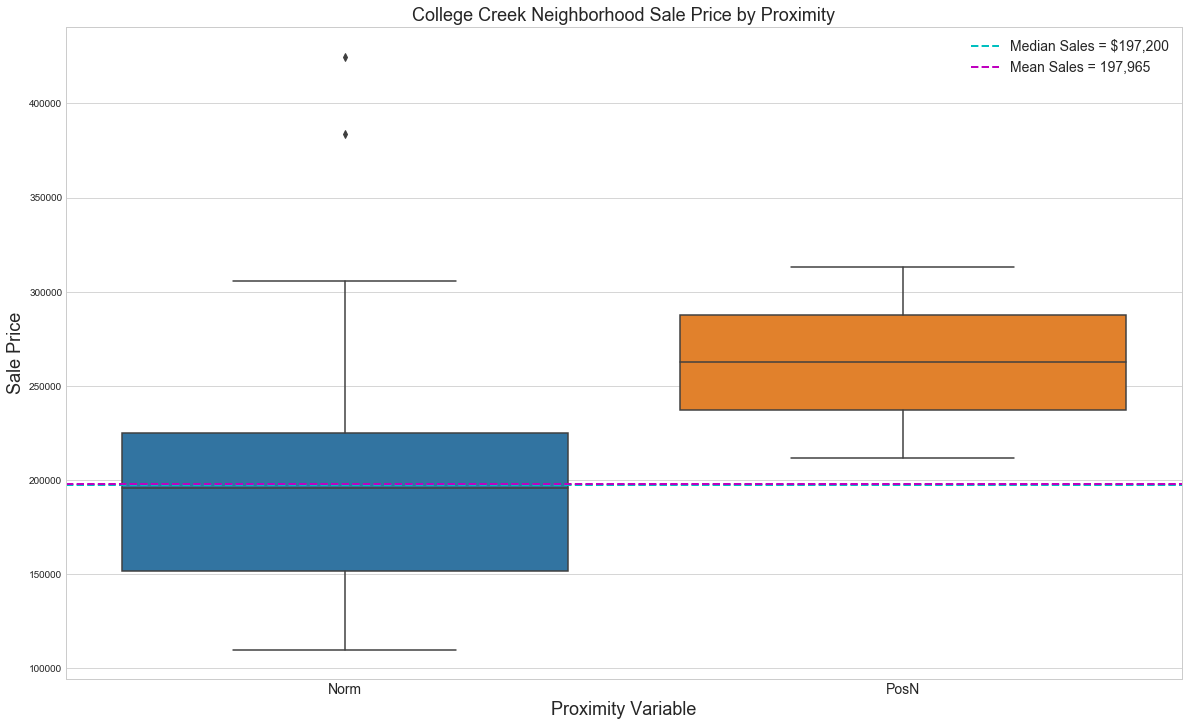

In [109]:
CollgCr = train.loc[lambda df: train['Neighborhood'] == 'CollgCr']
#print(CollgCr.SalePrice.median())
#print(CollgCr.SalePrice.mean())

plt.figure(figsize = (20,12))
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = CollgCr)
plt.axhline(CollgCr.SalePrice.median(), color = 'c', linestyle = 'dashed', linewidth = 2, label = 'Median Sales = $197,200')
plt.axhline(CollgCr.SalePrice.mean(), color = 'm', linestyle = 'dashed', linewidth = 2, label = 'Mean Sales = 197,965')
plt.xticks(size = 14)
plt.xlabel('Proximity Variable', size = 18)
plt.ylabel('Sale Price', size = 18)
plt.title('College Creek Neighborhood Sale Price by Proximity', size = 18)
plt.legend(prop={'size':14})

plt.show()

__Variables__

Norm = Normal

PosN = Near positive off-site feature--park, greenbelt, etc.

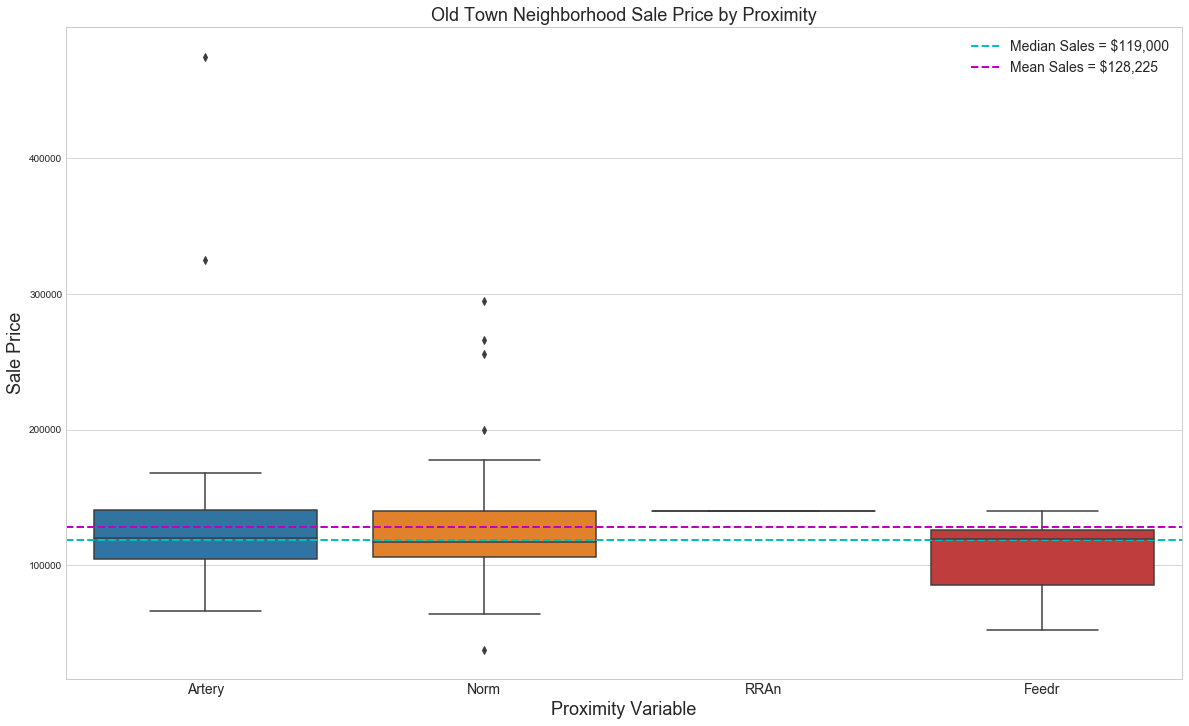

In [111]:
OldTown = train.loc[lambda df: train['Neighborhood'] == 'OldTown']
#print(OldTown.SalePrice.median())
#print(OldTown.SalePrice.mean())

plt.figure(figsize = (20,12))
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = OldTown)
plt.axhline(OldTown.SalePrice.median(), color = 'c', linestyle = 'dashed', linewidth = 2, label = 'Median Sales = $119,000')
plt.axhline(OldTown.SalePrice.mean(), color = 'm', linestyle = 'dashed', linewidth = 2, label = 'Mean Sales = $128,225')
plt.xticks(size = 14)
plt.xlabel('Proximity Variable', size = 18)
plt.ylabel('Sale Price', size = 18)
plt.title('Old Town Neighborhood Sale Price by Proximity', size = 18)
plt.legend(prop={'size':14})

plt.show()

__Variables__

Artery = Adjacent to arterial street

Norm = Normal

RRAn = Adjacent to North-South Railroad

Feedr = Adjacent to feeder street

In [98]:
#neighborhood_mean = np.array(train.groupby('Neighborhood')['SalePrice'].mean())
#neighborhood_median = np.array(train.groupby('Neighborhood')['SalePrice'].median())

#plt.figure(figsize = (20,7.5))
#plt.plot(neighborhood_mean, label = 'Mean')
#plt.plot(neighborhood_median, label = 'Median')
#plt.legend()
